In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import gseapy as gp
import matplotlib.pyplot as plt
import swan_vis as swan
import yaml
from snakemake.io import expand

p = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(p)

from proc_revisions.utils import *
from proc_revisions.plotting import *

In [2]:
od = '../../proc_revisions/'
config_file = f'{od}/config.yml'
with open(config_file) as f:
    config = yaml.safe_load(f)

In [3]:
ab = od+expand(config['lr']['talon']['fusion_fix']['ab'], species='human')[0]
unfilt_ab = od+expand(config['lr']['cerberus']['ab'], species='human')[0] 
filt_ab = od+expand(config['lr']['cerberus']['filt_ab'], species='human')[0]
read_annot = od+expand(config['lr']['talon']['full_annot'], species='human')[0]
t_metadata = od+expand(config['ref']['cerberus']['new_gtf_t_info'], species='human')[0]
lib_meta = od+expand(config['lr']['meta'], species='human')[0]
swan_file = od+expand(config['lr']['swan']['sg'], species='human')[0]
cerberus_h5 = od+expand(config['lr']['cerberus']['ca_triplets'], species='human', obs_col='sample')[0]
cerb_t_metadata = od+expand(config['lr']['cerberus']['gtf_t_info'], species='human')[0]
major_isos = od+expand(config['lr']['analysis']['major_isos'], species='human', obs_col='sample')[0]
pi_tpm_table = od+expand(config['lr']['mane']['pi_tpm']['triplet'], species='human', obs_col='sample')[0]

ref_t_metadata = od+expand(config['ref']['new_gtf_t_info'], species='human')[0]
ref_g_metadata = od+expand(config['ref']['new_gtf_g_info'], species='human')[0]

ver = 'v40_cerberus'
min_tpm = 1
gene_subset = 'polya'
obs_col = 'sample'
go_gene_subset = 'protein_coding'
predom_iso_subset = 'protein_coding'

m_lib_meta = od+expand(config['lr']['meta'], species='mouse')[0]

gtex_cerb_gtf = od+expand(config['gtex']['cerberus']['gtf'], species='human')[0]

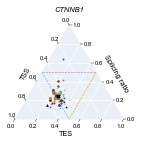

In [4]:
plot_obs_human_simplex_with_centroid(cerberus_h5,
                  'CTNNB1',
                  'figures/', 
                  source='sample_det',
                  gene_subset=gene_subset,
                  ver=ver)

In [8]:
# get the coords of the two samples
ca = cerberus.read(cerberus_h5)
samples = ['mcf10a', 'caco2']
ca.triplets.loc[(ca.triplets['sample'].isin(samples))&\
                (ca.triplets.source=='sample_det')&\
                (ca.triplets.gname=='CTNNB1')]

,source,gid,n_tss,n_tes,n_ic,n_iso,splicing_ratio,tss_ratio,tes_ratio,spl_ratio,sector,gname,sample,gene_tpm
99774,sample_det,ENSG00000168036,8.0,4.0,17.0,20.0,2.833333,0.539326,0.269663,0.191011,tss,CTNNB1,caco2,124.906631
476583,sample_det,ENSG00000168036,2.0,1.0,8.0,8.0,5.333333,0.240000,0.120000,0.640000,splicing,CTNNB1,mcf10a,76.340820


Read in graph from ../../proc_revisions/data/human/lr/swan/swan_graph.p
Calculating iso TPM values
Subsetting for polya genes
Enforcing minimum TPM
Total # isos detected: 236615
# isos >= 1 tpm: 213476
Applying gene type and novelty subset
Number of isos reported: 209819
Found 51 total samples
PLEASE UPDATE ME WHEN U HAVE PROTEIN RESULTS
TODO - also add this back in
TODO - also add this back in
TODO - also add this back in
TODO - also add this back in
TODO - also add this back in
TODO - also add this back in
TODO - also add this back in
TODO - also add this back in


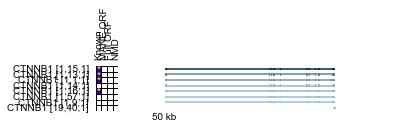

In [17]:
gene = 'CTNNB1'
obs_col = 'sample'
obs_condition = 'mcf10a'
light_shade = '#9bc3c9'
dark_shade= '#022a30'

_ = plot_browser_isos_2(cerberus_h5,
                        swan_file,
                        filt_ab,
                        None,#pp_summary,
                        major_isos,
                        gene,
                        obs_col,
                        obs_condition,
                        light_shade=light_shade,
                        dark_shade=dark_shade,
                        order='tss',
                        ofile=f'figures/ctnnb_{obs_condition}_browser_isos.pdf')
# ax, tpm_df = plot_browser_isos(ca, sg, gene,
#                              obs_col, obs_condition,
#                              filt_ab, major_isos,
#                              h=0.2, min_tpm=1,
#                              light_shade=light_shade, dark_shade=dark_shade)
# fname = '{}{}_{}_isos_browser.pdf'.format('figures/', gene.lower(), obs_condition)
# plt.savefig(fname, dpi=500)

Read in graph from ../../proc_revisions/data/human/lr/swan/swan_graph.p
Calculating iso TPM values
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/proc_revisions/utils.py:2087: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/proc_revisions/utils.py:2086: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # isos detected: 236615
# isos >= 1 tpm: 213476
Applying gene type and novelty subset
Number of isos reported: 209819
Found 51 total samples
PLEASE UPDATE ME WHEN U HAVE PROTEIN RESULTS
TODO - also add this back in
TODO - also add this back in
TODO - also add this back in
TODO - also add this back in
TODO - also add this back in
TODO - also add this back in
TODO - also add this back in
TODO - also add this back in
TODO - also add this back in
TODO - also add this back in
TODO - also add this back in
TODO - also add this back in
TODO - also add this back in
TODO - also add this back in
TODO - also add this back in
TODO - also add this back in
TODO - also add this back in
TODO - also add this back in
TODO - also add this back in
TODO - also add this back in


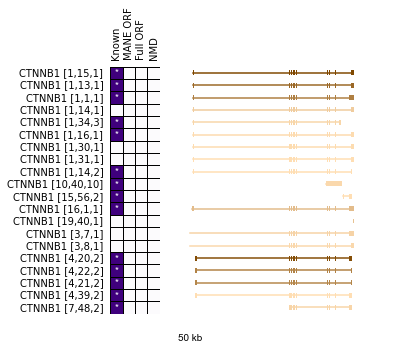

In [4]:
gene = 'CTNNB1'
obs_col = 'sample'
obs_condition = 'caco2'
light_shade = '#ffdeb3'
dark_shade = '#804800'
_ = plot_browser_isos_2(cerberus_h5,
                        swan_file,
                        filt_ab,
                        None,#pp_summary,
                        major_isos,
                        gene,
                        obs_col,
                        obs_condition,
                        light_shade=light_shade,
                        dark_shade=dark_shade,
                        order='tss',
                        add_tss=True,
                        ofile=f'figures/ctnnb_{obs_condition}_browser_isos.pdf')
# ax, tpm_df = plot_browser_isos(ca, sg, gene,
#                              obs_col, obs_condition,
#                              filt_ab, major_isos,
#                              h=0.2,
#                              add_tss=True, order='tss',
#                              light_shade=light_shade, 
#                              dark_shade=dark_shade)

# fname = '{}{}_{}_isos_browser.pdf'.format('figures/', gene.lower(), obs_condition)
# plt.savefig(fname, dpi=500)